In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


load data:

In [5]:
import pickle
images = pickle.load( open( "images.p", "rb" ) )
labels = pickle.load( open( "labels.p", "rb" ) )

In [27]:
images = array([image/image.max() for image in images])

In [7]:
shape(labels)

(180, 1)

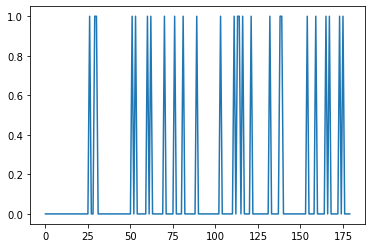

In [8]:
plot(labels)

divide into train and test. normalize

In [28]:
train_images, train_labels = images[:120], labels[:120]
test_images, test_labels = images[120:], labels[120:]


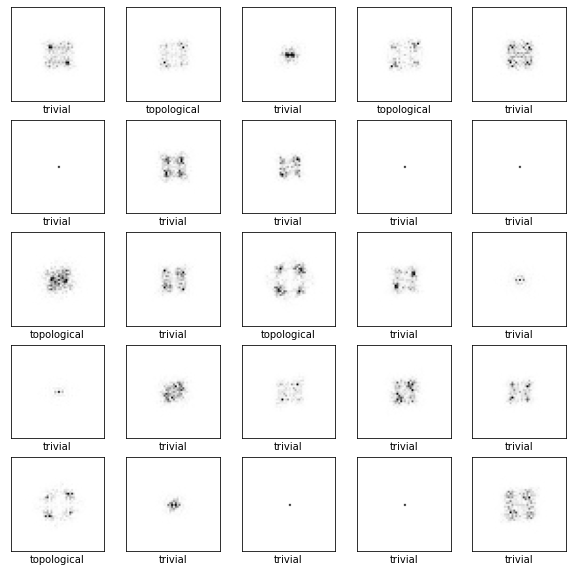

In [29]:
class_names = ['trivial', 'topological']

plt.figure(figsize=(10,10))
for i in range(50,75):
    plt.subplot(5,5,i-49)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [30]:
model = models.Sequential()
model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(100, (3, 3), activation='relu'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 100)       45100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 100)         90100     
Total params: 135,700
Trainable params: 135,700
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(2))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 50)        500       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 50)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 100)       45100     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 100)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 100)         90100     
_________________________________________________________________
flatten (Flatten)            (None, 8100)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               8

In [34]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 120 samples, validate on 60 samples
Epoch 1/10
120/120 [==============================] - 6s 46ms/sample - loss: 0.6388 - accuracy: 0.6833 - val_loss: 0.4996 - val_accuracy: 0.8333
Epoch 2/10
120/120 [==============================] - 3s 21ms/sample - loss: 0.4025 - accuracy: 0.8667 - val_loss: 0.3931 - val_accuracy: 0.8333
Epoch 3/10
120/120 [==============================] - 2s 20ms/sample - loss: 0.2857 - accuracy: 0.8667 - val_loss: 0.3431 - val_accuracy: 0.8333
Epoch 4/10
120/120 [==============================] - 2s 20ms/sample - loss: 0.2413 - accuracy: 0.9083 - val_loss: 0.3086 - val_accuracy: 0.8333
Epoch 5/10
120/120 [==============================] - 2s 21ms/sample - loss: 0.2275 - accuracy: 0.9250 - val_loss: 0.3261 - val_accuracy: 0.8333
Epoch 6/10
120/120 [==============================] - 3s 21ms/sample - loss: 0.2289 - accuracy: 0.9250 - val_loss: 0.3046 - val_accuracy: 0.8333
Epoch 7/10
120/120 [==============================] - 2s 21ms/sample - loss: 0.2070 -

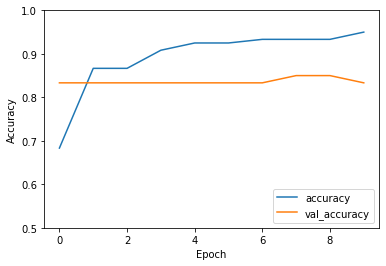

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [36]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

60/1 - 0s - loss: 0.2906 - accuracy: 0.8333
